

# Project: Investigate a Movie  Dataset
![Movies](movies.png)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project will be analyzing the TMDb movie data provided by Udacity. This dataset consists of more than 10000 rows (movies) with 21 features (columns) associated with each movie and the features are self-explanatory except probably for the following features such as `runtime`,`popularity`, `budget_adg`,`revenue_adj` and `tagline`.
> * `runtime`=**time between the starting upto the end of the credits scene**
> * `popularity`=**quantitative measure of the amount of member activity for a film**
> * `budget_adj`=**budget of the associated movie in terms of 2010 dollars**
> * `revenue_adj`=**revenue of the associated movie in terms of 2010 dollars**
> * `tagline`=**taglines (often called slogans) are catchy, enticing short phrases used by marketers and film studios to advertise and sell a movie (create "buzz"), and to sum up the plot, tone or themes of a film**
>
> We will explore this dataset to answer the following questions.
>### Q 1.Which days and months are the most popular for releasing a movie? How many movies had profits and how many had losses? What year was the most and least profitable year for movies?
> ### Q 2. How many times each genre was the most popular gendre of the year ?
>### Q 3.What genre was the most profitable on average during all these the years?
>### Q 4. Is the popularity/ratings/runtime correlated to the movies profits? Are the ratings correleated to the popularity of movies?

>### Let's import the necessary libraries needed for our analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
plt.style.use("fivethirtyeight")
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> The data wrangling process is going to have three parts
> * gather data
> * assess data
> * clean data

### General Properties (gather and assess data part)
> In this section we will save our dataset in a dataframe and see the basic properties of the dataset such as
> *  print few lines of the data and see the dimensions of the data
> * types of the data
> * number of missing values in each column
> * quick summary statistics for our data
> * number of duplicated rows

In [2]:
# Load your data and print out a few lines.
df=pd.read_csv("tmdb-movies.csv")
print("The number of rows of the data set is",df.shape[0])# prints the number of rows
print("\n")
print("The number of columns of the data set is",df.shape[1])#prints the number of columns
print("\n")
print("The first 5 rows of the data set are:")
df.head() #prints the first 5 rows of the data


The number of rows of the data set is 10866


The number of columns of the data set is 21


The first 5 rows of the data set are:


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# print the datatype of each column 
print(df.dtypes) # prints the datatype. Those ones which are of object type require more investigation


id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


In [4]:
# Get more precise data type for all those object type-columns
cols=["imdb_id","original_title","cast","homepage","director","tagline","keywords","overview","genres",
      "production_companies","release_date"]
for col in cols:
    print(col,":",type(df[col][0]))

imdb_id : <class 'str'>
original_title : <class 'str'>
cast : <class 'str'>
homepage : <class 'str'>
director : <class 'str'>
tagline : <class 'str'>
keywords : <class 'str'>
overview : <class 'str'>
genres : <class 'str'>
production_companies : <class 'str'>
release_date : <class 'str'>


In [5]:
# print the columns having missing values and number of missing values in each column
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
# print number of duplicated rows
print("Total number of duplicated rows is",df.duplicated().sum())
print("\n")
print("The duplicated row(s) is(are) ")
df[df.duplicated()]

Total number of duplicated rows is 1


The duplicated row(s) is(are) 


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [7]:
#print summary statistics
df.describe() # Note in the table below that there are some movies with runtime=0. They will be removed 
# from the data Also there are some movies whose budget was zero dollars and revenue more than zero dollars

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09




### Data Cleaning 
> For our analaysis we are going to do the following:
> * keep the columns ` [original_title,popularity,budget,revenue,cast,runtime,genres,release_date,release_year,value_count,value_average,budget_adj,revenue_adj]`
>* Remove the missing values and duplicated row
>* filter those rows corresponding to runtime >0
>* change the data type of `release_date` to datetime object and of `budget` and `revenue` columns to float
>* create new columns `month` and `day` which will contain the months and the days the movies released
>* create the column named `profit=revenue-budget` and `profit_adj=revenue_adj-budget_adj`



### Keep the aforementioned columns for our analysis and call the new dataframe by `df_modified`

In [8]:
# keep the aforementioned columns
columns=['original_title','popularity','budget','revenue','cast','runtime','genres','release_date','release_year','vote_count',
      'vote_average','budget_adj','revenue_adj']
df_modified=df[columns]
df_modified.head()

,original_title,popularity,budget,revenue,cast,runtime,genres,release_date,release_year,vote_count,vote_average,budget_adj,revenue_adj
0,Jurassic World,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,5562,6.5,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015,6185,7.1,1.379999e+08,3.481613e+08
2,Insurgent,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2015,2480,6.3,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015,5292,7.5,1.839999e+08,1.902723e+09
4,Furious 7,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2015,2947,7.3,1.747999e+08,1.385749e+09


### Remove the rows with missing and duplicated values

In [9]:
df_modified.dropna(axis=0, how="any",inplace=True); #removes the null values
df_modified.drop_duplicates(inplace=True,ignore_index=True)#removes the duplicated rows and number the rows
#as 0,1,2,etc

<ipython-input-9-c234770ceebb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modified.dropna(axis=0, how="any",inplace=True); #removes the null values
<ipython-input-9-c234770ceebb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modified.drop_duplicates(inplace=True,ignore_index=True)#removes the duplicated rows and number the rows


### Filter those movies that correspond to runtime>0

In [10]:
mask=df_modified.runtime>0
df_modified=df_modified[mask]#keeps only those movies which lasted for more than zero minutes
df_modified.describe()# prints the summary statistics

,popularity,budget,revenue,runtime,release_year,vote_count,vote_average,budget_adj,revenue_adj
count,10737.000000,1.073700e+04,1.073700e+04,10737.000000,10737.000000,10737.000000,10737.000000,1.073700e+04,1.073700e+04
mean,0.652212,1.479550e+07,4.029838e+07,102.699544,2001.257334,219.690603,5.968855,1.775536e+07,5.197821e+07
std,1.004516,3.105779e+07,1.176231e+08,30.470645,12.822022,578.676174,0.931291,3.445921e+07,1.453894e+08
min,0.000065,0.000000e+00,0.000000e+00,3.000000,1960.000000,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,0.210680,0.000000e+00,0.000000e+00,90.000000,1995.000000,17.000000,5.400000,0.000000e+00,0.000000e+00
50%,0.386979,0.000000e+00,0.000000e+00,99.000000,2006.000000,39.000000,6.000000,0.000000e+00,0.000000e+00
75%,0.720175,1.600000e+07,2.500000e+07,112.000000,2011.000000,148.000000,6.600000,2.109080e+07,3.467884e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,2015.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09


### It is interesting to observe that there are some movies with budget equals to zero dollars and the revenue equals more than zero dollars

> Check the code below




In [11]:
print(sum(df_modified[df_modified.budget==0].revenue>0),
      "movies have had budget zero dollars and revenue more than zero dollars")

df_modified[df_modified.budget==0][["budget","revenue"]].head()#prints movies with budget equals zero

994 movies have had budget zero dollars and revenue more than zero dollars


,budget,revenue
30,0,29355203
36,0,22354572
72,0,45895
74,0,0
75,0,0


### Change the data type of  the column `release_data` to datetime data type

In [12]:
df_modified["release_date"]=pd.to_datetime(df_modified["release_date"]) # Now release_date is of datetime object
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10737 entries, 0 to 10766
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   original_title  10737 non-null  object        
 1   popularity      10737 non-null  float64       
 2   budget          10737 non-null  int64         
 3   revenue         10737 non-null  int64         
 4   cast            10737 non-null  object        
 5   runtime         10737 non-null  int64         
 6   genres          10737 non-null  object        
 7   release_date    10737 non-null  datetime64[ns]
 8   release_year    10737 non-null  int64         
 9   vote_count      10737 non-null  int64         
 10  vote_average    10737 non-null  float64       
 11  budget_adj      10737 non-null  float64       
 12  revenue_adj     10737 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(3)
memory usage: 1.1+ MB


### Change the data type of columns budget and revenue to float

In [13]:
df_modified["revenue"]=df_modified["revenue"].astype(float)
df_modified["budget"]=df_modified["budget"].astype(float)

### Create new columns called `month` and `day` which will contain the months and the days the movies released

In [14]:
df_modified['month']=df_modified["release_date"].dt.strftime("%b")#contains months
df_modified["day"]=df_modified["release_date"].dt.strftime("%a")#contains days
df_modified[["month","day"]].head()

,month,day
0,Jun,Tue
1,May,Wed
2,Mar,Wed
3,Dec,Tue
4,Apr,Wed


### Create the new column `profit` and `profit_adj`

In [15]:
df_modified["profit"]=df_modified['revenue']-df_modified['budget']
df_modified['profit_adj']=df_modified['revenue_adj']-df_modified['budget_adj']
df_modified.info() #prints all the information about the columns of df_modified after it's been cleaned 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10737 entries, 0 to 10766
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   original_title  10737 non-null  object        
 1   popularity      10737 non-null  float64       
 2   budget          10737 non-null  float64       
 3   revenue         10737 non-null  float64       
 4   cast            10737 non-null  object        
 5   runtime         10737 non-null  int64         
 6   genres          10737 non-null  object        
 7   release_date    10737 non-null  datetime64[ns]
 8   release_year    10737 non-null  int64         
 9   vote_count      10737 non-null  int64         
 10  vote_average    10737 non-null  float64       
 11  budget_adj      10737 non-null  float64       
 12  revenue_adj     10737 non-null  float64       
 13  month           10737 non-null  object        
 14  day             10737 non-null  object        
 15  pr

In [16]:
df_modified.head()

,original_title,popularity,budget,revenue,cast,runtime,genres,release_date,release_year,vote_count,vote_average,budget_adj,revenue_adj,month,day,profit,profit_adj
0,Jurassic World,32.985763,150000000.0,1.513529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,5562,6.5,1.379999e+08,1.392446e+09,Jun,Tue,1.363529e+09,1.254446e+09
1,Mad Max: Fury Road,28.419936,150000000.0,3.784364e+08,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,6185,7.1,1.379999e+08,3.481613e+08,May,Wed,2.284364e+08,2.101614e+08
2,Insurgent,13.112507,110000000.0,2.952382e+08,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,2480,6.3,1.012000e+08,2.716190e+08,Mar,Wed,1.852382e+08,1.704191e+08
3,Star Wars: The Force Awakens,11.173104,200000000.0,2.068178e+09,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,5292,7.5,1.839999e+08,1.902723e+09,Dec,Tue,1.868178e+09,1.718723e+09
4,Furious 7,9.335014,190000000.0,1.506249e+09,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2015,2947,7.3,1.747999e+08,1.385749e+09,Apr,Wed,1.316249e+09,1.210949e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Q 1.Which days and months are the most popular for releasing a movie? How many movies had profits and how many had losses? What year was the most and least profitable year for movies?

**The code below shows that the most popular day for releasing a movia is Friday**. 

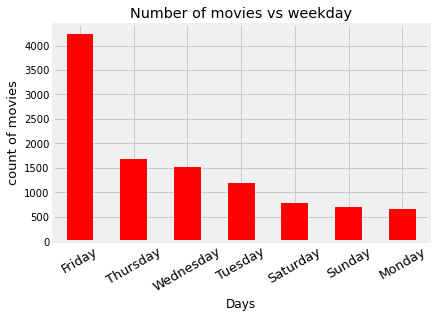

In [17]:
def most_popular_day():
    df_modified['day'].value_counts().plot(kind="bar",color="red",rot=30)
    plt.xticks([0,1,2,3,4,5,6],["Friday","Thursday","Wednesday","Tuesday","Saturday","Sunday","Monday"],fontsize=13);
    plt.xlabel("Days")
    plt.ylabel("count of movies",fontsize=13)
    plt.title("Number of movies vs weekday");
most_popular_day()



**The code below shows that September was the most populat month for releasing movies**

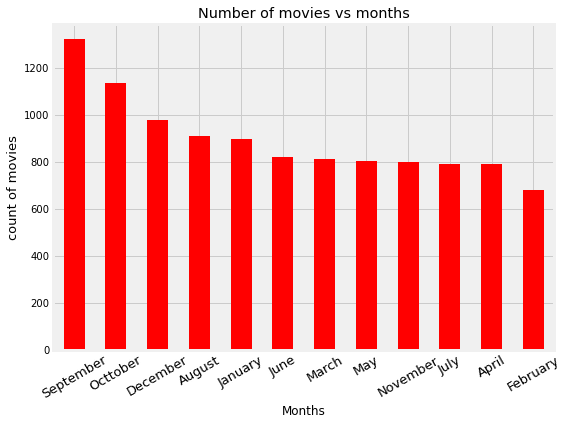

In [18]:
def most_popular_month():
    df_modified['month'].value_counts().plot(kind="bar",color="red",rot=30,figsize=(8,6),title="Months the movies released")
    plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],["September","Octtober","December","August","January","June","March","May",
                                       "November","July","April","February"],fontsize=13);
    plt.title("Number of movies vs months")
    plt.xlabel("Months")
    plt.ylabel("count of movies",fontsize=13);
most_popular_month()

**The code below shows that approximately 35% of movies recorded profits, 22% losses and 42% had zero profits**

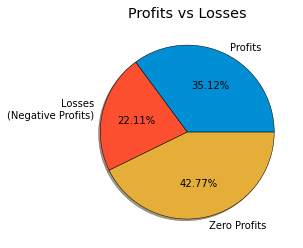

In [19]:
def make_pie():
    labels=["Profits","Losses\n(Negative Profits)","Zero Profits"]
    height_profits=sum(df_modified.profit>0)#wedge corresponding to the movies with profits
    height_losses=sum(df_modified.profit<0)#wedge corresponding to the movies with losses(negative profits)
    height_zero=sum(df_modified.profit==0)#wedge corresponding to the movies wit hzero profits
    values=[height_profits,height_losses,height_zero]
    plt.pie(values,labels=labels,autopct="%2.2f%%",
       shadow=True,wedgeprops={"edgecolor":"black"});
    plt.title("Profits vs Losses");
    
make_pie()


**The code below shows that on average 1977 was the most profitable year for movies with profits equal to 
$\$130$M and 1966 was the least profitable on average with profits equal to $\$3.96$M Also we can observe from the table below that the prifts made in 2000's are less than the ones made in 1977**

In [20]:
#The first row gives us the most profitable year and the last row the least profitable year
df_modified.groupby("release_year")["profit_adj"].mean().sort_values(ascending=False)

release_year
1977    1.297131e+08
1967    1.067978e+08
1973    1.034728e+08
1975    8.298967e+07
1965    7.669502e+07
1979    7.537640e+07
1974    7.071519e+07
1961    6.861480e+07
1970    6.083370e+07
1972    5.976551e+07
1978    5.969460e+07
1982    5.636968e+07
1976    5.534404e+07
1992    5.463087e+07
1989    5.322906e+07
1995    5.173239e+07
1990    5.089185e+07
1964    5.046705e+07
1983    4.894267e+07
1980    4.770202e+07
1993    4.388930e+07
1987    4.260125e+07
1997    4.199198e+07
1981    4.096954e+07
2002    4.052268e+07
1969    3.999063e+07
2001    3.969449e+07
1985    3.955860e+07
1991    3.900848e+07
1994    3.890628e+07
1984    3.847529e+07
1986    3.810119e+07
2003    3.767045e+07
1988    3.656765e+07
1962    3.623546e+07
2004    3.618822e+07
1999    3.267067e+07
1971    3.220480e+07
1998    3.180858e+07
1968    3.180575e+07
1996    3.166989e+07
2000    2.967553e+07
2015    2.876447e+07
2005    2.853784e+07
2007    2.848716e+07
1960    2.832787e+07
2012    2.707507e+07


**The production of movies has an increasing trend except for the period 1990-1994 and 2008-2011 as the line chart indicates this fact bellow.(recall that around 2008-2011 the world went through the financial crisis.) Maybe 1977 was more profitable year than any 2000's year. However, according to the line chart below, way more movies were produced in 2000's. As result, this fact might have contributed to lower profits on average in 2000's** 

Text(0, 0.5, 'Number of movies')

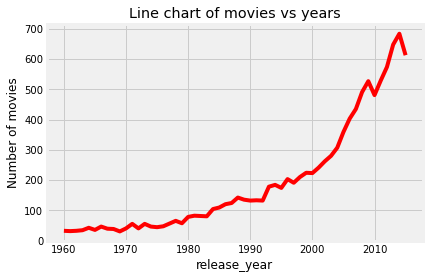

In [21]:
df_modified.groupby("release_year")["profit_adj"].count().plot(title="Line chart of movies vs years",color="red")
plt.ylabel("Number of movies")

>**The table below shows some summary statistics for the movies profits**

In [22]:
df_modified.groupby("release_year")["profit_adj"].describe().sort_values(by="max",ascending=False)
 #we sort the summary statistics table by the column called max                                                                                               ascending=False)

,count,mean,std,min,25%,50%,75%,max
release_year,,,,,,,,
1977,56.0,1.297131e+08,4.103364e+08,-3.597781e+07,0.000000e+00,0.000000e+00,7.802146e+07,2.750137e+09
2009,527.0,2.620285e+07,1.428058e+08,-1.016400e+08,-2.267549e+05,0.000000e+00,1.521734e+05,2.586237e+09
1997,191.0,4.199198e+07,1.859322e+08,-1.222614e+08,-4.679064e+06,0.000000e+00,3.787219e+07,2.234714e+09
1973,55.0,1.034728e+08,3.267321e+08,-2.278180e+07,0.000000e+00,0.000000e+00,2.368307e+07,2.128036e+09
1975,44.0,8.298967e+07,2.945662e+08,-6.077732e+07,0.000000e+00,0.000000e+00,3.999598e+07,1.878643e+09
1982,81.0,5.636968e+07,2.069153e+08,-7.230856e+07,0.000000e+00,0.000000e+00,3.877416e+07,1.767968e+09
2015,613.0,2.876447e+07,1.328344e+08,-5.519998e+07,0.000000e+00,0.000000e+00,4.549453e+05,1.718723e+09
1995,174.0,5.173239e+07,1.562668e+08,-1.137371e+08,0.000000e+00,0.000000e+00,4.164620e+07,1.551568e+09
1961,31.0,6.861480e+07,2.803670e+08,-2.917944e+07,0.000000e+00,0.000000e+00,1.021281e+07,1.545635e+09


>__From the above table we can see that 1977 was the year when the most profitable movie was produced with its profits to be equal to $2.7501371$ billions dollars(look at the column called `max`). The name of that movie was `Stars Wars`.(see the code below)__

In [23]:
mask=df_modified["release_year"]==1977
most_profitable_movie=df_modified[mask][["original_title","profit_adj"]].sort_values(by="profit_adj",ascending=False)
most_profitable_movie                                                                                

,original_title,profit_adj
1307,Star Wars,2.750137e+09
1312,Close Encounters of the Third Kind,1.021009e+09
1318,Saturday Night Fever,8.404891e+08
1308,The Spy Who Loved Me,6.167988e+08
1320,Smokey and the Bandit,4.559735e+08
1359,The Goodbye Girl,3.669737e+08
1309,The Rescuers,2.519018e+08
1344,"Oh, God!",1.499816e+08
1310,Annie Hall,1.232291e+08
1313,A Bridge Too Far,1.034362e+08


>__Now we would like to see what the least profitable movie. According to the table below, the leat profitable movie was produced in 2010 with its losses equal to $414$ million dollars approximately (look at the column `min` first row)__

In [24]:
df_modified.groupby("release_year")["profit_adj"].agg([np.mean,np.std,"max","min"]).sort_values(by="min",ascending=True)

,mean,std,max,min
release_year,,,,
2010,2.620568e+07,1.023622e+08,8.631719e+08,-4.139124e+08
2013,2.234288e+07,9.674178e+07,1.052306e+09,-1.551102e+08
1970,6.083370e+07,1.746145e+08,7.537166e+08,-1.404092e+08
2004,3.618822e+07,1.156187e+08,8.887368e+08,-1.375868e+08
1999,3.267067e+07,1.304395e+08,1.059439e+09,-1.286813e+08
1997,4.199198e+07,1.859322e+08,2.234714e+09,-1.222614e+08
1966,3.969746e+06,3.519472e+07,1.762585e+08,-1.209243e+08
1998,3.180858e+07,9.670792e+07,5.535378e+08,-1.203926e+08
2003,3.767045e+07,1.239693e+08,1.214855e+09,-1.185350e+08


>__The name of the least profitable movie is [The Warrior's Way](https://en.wikipedia.org/wiki/The_Warrior%27s_Way). The code is  given below.__

In [25]:
mask=df_modified["release_year"]==2010
least_profitable_movie=df_modified[mask][["original_title","profit_adj"]].sort_values(by="profit_adj",ascending=True)
least_profitable_movie

,original_title,profit_adj
2215,The Warrior's Way,-413912431.0
2041,The Wolfman,-150000000.0
2185,The Pacific,-120000000.0
2161,Double Wedding,-104002432.0
2015,The Nutcracker: The Untold Story,-73821041.0
...,...,...
1931,The Twilight Saga: Eclipse,630491347.0
1891,Inception,665500000.0
1895,Harry Potter and the Deathly Hallows: Part 1,704305868.0
1893,Alice in Wonderland,825467110.0


 ### Q 2. How many times each gendre was the most popular gendre of the year ?

>To answer this question we will follow the steps below
> 1. Create the list of genres
> 2.Create a dataframe of movies for each genre
> 3. To find the most popular genre for a specific year we need to do the following. Calculate the average popularity of each genre for that year and then take the maximum of those averages and find the genre for which tha max is attained. That genre will be the most popular genre of that year.
> 4. Then count the number of times each genre was the most popular genre of the year.

>**1.Create the list of genres. We will need for this a function called make_dictionary. See the code below**

In [26]:
def make_dictionary(data, column_name,sep="|"):
    """ This function finds each distinct genre/actors name that appears in the dataset and its frequency"""
    container={}
    for row in df[column_name].str.split(sep):
        if type(row)!=float:
            for element in row:
                if element not in container:
                    container[element]=1
                else:
                    container[element]+=1
    return container

>**Now we create the list of genres**

In [27]:
genres=list(make_dictionary(df_modified,"genres").keys())
genres #list of genres

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Fantasy',
 'Crime',
 'Western',
 'Drama',
 'Family',
 'Animation',
 'Comedy',
 'Mystery',
 'Romance',
 'War',
 'History',
 'Music',
 'Horror',
 'Documentary',
 'TV Movie',
 'Foreign']

>**2. Create a dataframe for each genre which will contain movies associated with that genre**

In [28]:
df_genres={genre:df_modified[df_modified["genres"].str.contains(genre)] for genre in genres}#This dictionary
#contains dataframes for each genre

>**3. First we create a dataframe called `dataframe` which contains the average popularity of each genrde for each year**

In [29]:
dataframe=pd.DataFrame({genre:df_genres[genre].groupby("release_year")["popularity"].mean()for genre in genres})
dataframe.head()# The nan values in the table below indicate that for that specific year there wasn't a movie 
#of that genre

,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,Drama,Family,Animation,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
release_year,,,,,,,,,,,,,,,,,,,,
1960,0.590724,0.700981,0.327905,0.811910,0.428247,0.346479,0.567759,0.566305,0.278064,NaN,0.396000,NaN,0.541227,0.225863,0.412364,0.423531,0.591450,NaN,NaN,0.194948
1961,0.365913,0.767323,0.274103,NaN,0.154073,0.806519,0.210021,0.432233,0.755722,2.631987,0.679838,0.712793,0.426036,0.531184,0.334463,0.564748,0.254578,NaN,NaN,0.113651
1962,0.708945,0.942513,0.179212,0.760582,0.235542,0.472816,0.414180,0.392000,0.323463,NaN,0.273183,0.259220,0.365621,0.506162,0.600060,0.323933,0.179368,NaN,NaN,0.235542
1963,0.951729,0.728487,0.467835,0.719929,0.214071,0.552367,0.246957,0.322448,0.852632,2.180410,0.444481,0.421033,0.399573,0.664326,0.481618,NaN,0.376901,NaN,NaN,0.351647
1964,0.813087,0.736431,0.226636,0.622580,0.599791,0.261690,0.127679,0.364818,0.878298,0.445746,0.491229,0.308091,0.221586,0.930959,0.316377,0.753799,0.189650,NaN,NaN,0.152209


**3.cont. Now we find the most popular gendre for each year. We will store these genres in the dataframe called `most_popular`. Then we will use the function `value_counts()` to see the number of times each gendre was the most popular gendre of the year**

In [30]:
most_popular=dataframe.apply(lambda x:np.argmax(x),axis=1).map({k: genres[k] for k in range(len(genres))})
most_popular.head()#gives the most popular gendre for each year

release_year
1960     Thriller
1961    Animation
1962    Adventure
1963    Animation
1964          War
dtype: object

In [31]:
most_popular.value_counts()#counts the number of years each gendre was the most popular gendre of the year

Adventure          14
Animation          11
Fantasy             9
Crime               5
War                 3
Mystery             2
Western             2
Action              2
Science Fiction     2
Music               2
Family              2
History             1
Thriller            1
dtype: int64

**Visualize the above table via a bar chart**

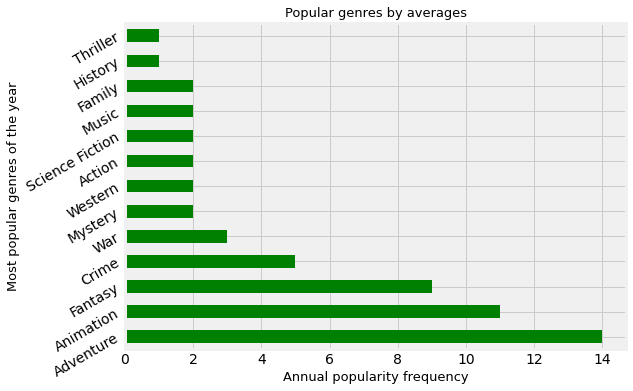

In [32]:
most_popular.value_counts().plot(kind="barh",rot=30,figsize=(8,6),color="green",fontsize=14)
plt.xlabel("Annual popularity frequency",fontsize=13)
plt.ylabel("Most popular genres of the year",fontsize=13)
plt.title("Popular genres by averages",fontsize=13);

In [33]:
#Let's include all these three steps in a function
def most_popular_genre():
    dataframe.apply(lambda x:np.argmax(x),axis=1).map({k: genres[k] for k in range(len(genres))}).value_counts().plot(kind="barh",rot=30,figsize=(8,6),color="green",fontsize=14)
    plt.xlabel("Annual popularity frequency",fontsize=13)
    plt.ylabel("Most popular genres of the year",fontsize=13)
    plt.title("Popular genres by averages",fontsize=13);

**We'd like to highlight the fact that we compared the averages to find the most popular genre of the year. However, had we chosen medians insread the bar chart would've changed a little bit. As the code shows below, when we compare medians, the genre 'Animation' becomes the most popular genre of the year more times than 'Adventure'. Also, 'TV Movie' has become the most popular genre of the year twice and it did not appear at all
on the bar chart above when we compared averages.**

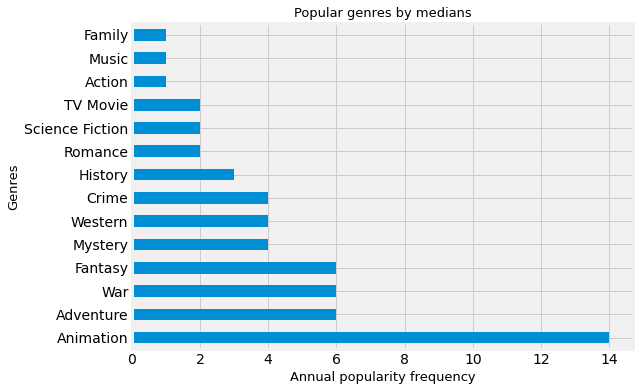

In [34]:
dataframe_median=pd.DataFrame({genre:df_genres[genre].groupby("release_year")["popularity"].median()for genre in genres})
#dataframe_median contains the popularity median of each genre for each year 
most_popular_by_median=dataframe_median.apply(lambda x:np.argmax(x),axis=1).map({k: genres[k] for k in range(len(genres))})
#this series contains the most popular genre for each year by comparing the medians
most_popular_by_median.value_counts().plot(kind="barh",figsize=(8,6),fontsize=14)
plt.xlabel("Annual popularity frequency",fontsize=13)
plt.ylabel("Genres",fontsize=13)
plt.title("Popular genres by medians",fontsize=13);

### Q 3.What genre was the most profitable on average during all these  years?

>**We would expect that the genre `Adventure`,according to the green bar chart, would be the most profitable on average. The code below verifies this fact.**

In [35]:
#Let's print the average profits for each genre
average_profit=[ df_genres[genre]["profit_adj"].mean()for genre in genres]#computes the average profit 
    #for each genre during all these years
profits_per_genre=pd.DataFrame({"Genres":genres,"Average Profits":average_profit})#creates a datframe 
#with average profits associated to each genre
profits_per_genre.sort_values(by="Average Profits",ascending=False) #from the table below we see that Adventure 
#was the most profitable on average

,Genres,Average Profits
1,Adventure,9.793763e+07
4,Fantasy,7.429146e+07
9,Animation,6.265355e+07
8,Family,6.151627e+07
0,Action,5.892174e+07
2,Science Fiction,5.759472e+07
13,War,4.136243e+07
5,Crime,3.512884e+07
3,Thriller,3.465309e+07
15,Music,3.453716e+07


> __Let's visualize the above table via a bar chart.__

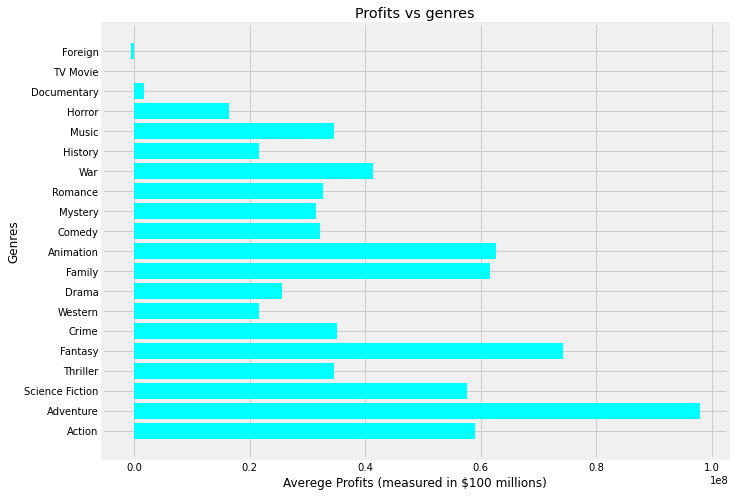

In [36]:
def most_profitable_genre():
    plt.figure(figsize=(10,8))
    average_profit=[ df_genres[genre]["profit_adj"].mean()for genre in genres] #computes the average profit 
    #for each genre during all these years
    plt.barh(genres,average_profit,facecolor="cyan",color="black")#bar chart for averages profits
    plt.title("Profits vs genres")
    plt.ylabel("Genres")
    plt.xlabel("Averege Profits (measured in $100 millions)");
most_profitable_genre()

### Q 4. Is the popularity/ratings/runtime correlated to the movies profits? Are the ratings correleated to the popularity of movies?

>__We would expect that the popularity and ratings would have positive correlation with the movies profits. As a result, ratings and popularity wouls have a positive correlation as well. Note ratings in this context are interpreted as vote averages. To verify it we first vilualize these relationships via a scatter matrix and then print the correlation matrix below.__ 

<Figure size 720x720 with 0 Axes>

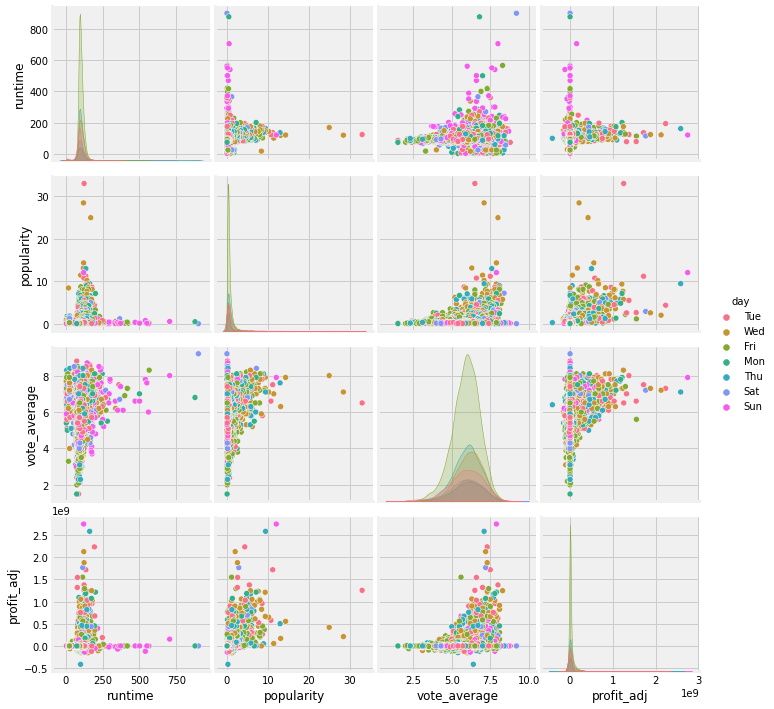

In [37]:
plt.figure(figsize=(10,10))
sns.pairplot(df_modified,vars=["runtime","popularity","vote_average","profit_adj"],hue="day");
#creates a scatter matrix between the variables "runtime","popularity","vote_average" and "profit_adj"


>__From the last row we can see that the profits have a positive correlation with the ratings and the popularity. Also, from the second row we can see that there is some positive correlation between the popularity and ratings.The correlation matrix is printed in the cell below.__

In [38]:
print("The Correlation Matrix is:")
correlation=df_modified[["runtime","popularity","vote_average","profit_adj"]].corr(method="pearson")
correlation #prints the correlation between variables


The Correlation Matrix is:


,runtime,popularity,vote_average,profit_adj
runtime,1.000000,0.134699,0.170084,0.141898
popularity,0.134699,1.000000,0.215383,0.562459
vote_average,0.170084,0.215383,1.000000,0.201418
profit_adj,0.141898,0.562459,0.201418,1.000000


> __The correlation matrix can be visualized via a heatmap printed below__

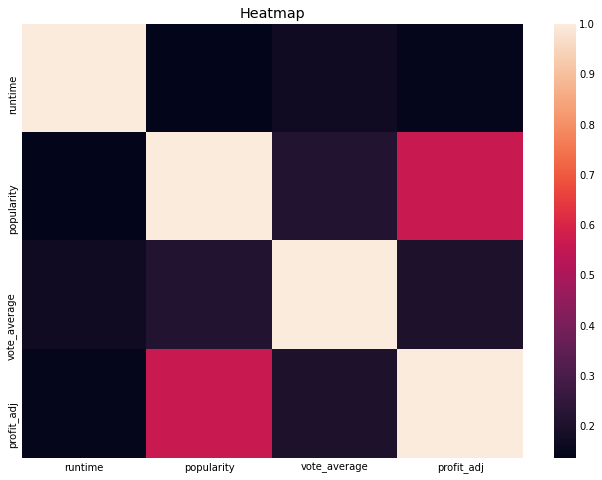

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns)#prints the heatmap 
#of the correlation
plt.title("Heatmap");

__From correlation matrix we can see that there  is a positive correlation between profits and ratings (\~0.2)
and profits and popularity (\~0.5). The low correlation coefficient (0.2) indicate that there is no strong linear relationship between profits and raing but there might be some other nonlinear relationship between these varibales. However, further exploration requires machine learniong techniques which we will not take this path here.__

<a id='conclusions'></a>
## Conclusions



>**Conclusions:**
>* We analyzed the movie data set which includes more than 10000 movies. A big Number these movies released in 80's 90's and 2000's. Approximately,35\% of the movies showed profits, 22\% recorded losses and 42\% had zero profits. Furthermore, the most popular day for releasing a movie was Friday  and the one of the most popular months for releasing a movie were September/October (probably it has to do with the [film awards seasons](https://en.wikipedia.org/wiki/Film_awards_seasons)). The most profitable year for movies on average was 1977 and the least profitable was 1966. in fact, the most profitable movie was released in 1977 and it was called `Star Wars`. with its profits equal approximately to $\$2.75$B dollars. In addition, the least profitable movie was produced in 2010 and it was called `The Warrior's Way` with its losses equal to $\$414$M dollars.

>* In the second part, we analyzed the genres of the movies and concluded that the most popular genre of the year on average was `Adventure` for 14 times with the profits of the adventure movies equal to 
$\$98$M dollars approximately. The lest profitable genre was `Foreign` with the losses equal $\$600$K dolllars. 

>* In the final part of our analysis, we saw that, on average, the increase in popularity and ratings of movies had an increasing effect on movies profits. In fact we saw a stronger positive correlation between `popularity`
and the movies profits (`profits_adj`) than between ratings (`vote_average`) and the movies profits (`profits_adj`). It would be good to know what criteria were used for calculating the movies ratings.

>**Limitations:**
>* We have used TMBD Movies data set for our analysis and worked with `profit_adj`,`release_year`,`genres`,`runtime` and `vote_average`. We added two more features to the dataframe, sucha as `day` and `month` the movies released, in order to extract more information about the movie data. 

>* The movie data set had some missing values and we decided to drop the rows with missing values. Removing these rows could possible skew our data and lead us to unintentional biased conclusions. In addition,
there were some movies with zero budget and positive profits. We considered these scenarios. as a real world situations. However, these scenarios require more invistigations. For example, whether the budgets of these movies should be considered as missing values and impute them with some other values.
>* The conclsions of our analysis can be applied only to our current data set and connnot be generalized as no statistical test has been performed in our analysis.